In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

In [2]:
# Define filepath
filepath = "D:/Projects/Fraud Detaction/"

# Lode data into df
df = pd.read_excel(filepath+'sys.xlsx')

In [3]:
# Display first five row 
df.head()

,Type,Amount,Source-OB,Source-NB,Dest-OB,Dest-NB,IsFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [4]:
# Filter row with 'TRANSFER' in 'Type' column
Transfer = df[df['Type'].isin(['TRANSFER'])]

# Reset index and drop old index
Transfer.reset_index(inplace=True,drop=True)

# Export Transfer data
Transfer.to_excel(filepath+'transfer.xlsx', index=False) 

In [5]:
# Define features for PCA
features = ['Amount', 'Source-OB', 'Source-NB', 'Dest-OB' , 'Dest-NB']

# Define Target for PCA
targets = ['IsFraud']

# Defining input and output variables 
x = Transfer[features] #input
y = Transfer[targets] #output

In [6]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Standardize the input variable 
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

# PCA to reduce dimension
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Create dataframe with principal componants and output variable
pdf = pd.DataFrame(x_pca, columns = ['pc1', 'pc2'])
pdf["IsFraud"] = y
pdf

,pc1,pc2,IsFraud
0,-1.301657,-0.342329,1
1,-1.184617,-0.274683,0
2,-0.584830,-0.254088,0
3,-1.263001,-0.056407,0
4,-1.261639,-0.306089,0
...,...,...,...
86748,-1.031783,-0.329943,0
86749,-0.954794,-0.152711,0
86750,-0.471648,-0.252440,0
86751,-1.169547,0.045697,0


In [7]:
# Information covered by pc1 and pc2
pca.explained_variance_ratio_

array([0.41731398, 0.34509703])

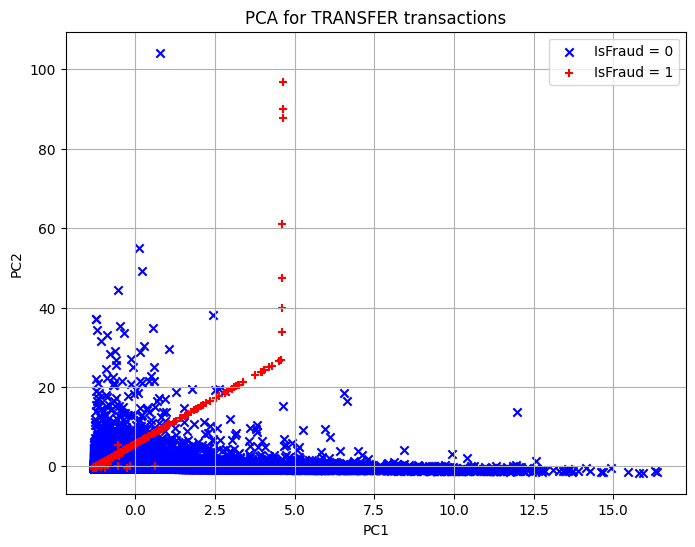

In [8]:
# Set figure size
plt.figure(figsize=(8, 6))

# Plot for non-fraud transaction
plt.scatter(pdf.loc[pdf['IsFraud'] == 0, 'pc1'], pdf.loc[pdf['IsFraud'] == 0, 'pc2'], c='blue', marker='x', label='IsFraud = 0')

# Plot for fraud transaction
plt.scatter(pdf.loc[pdf['IsFraud'] == 1, 'pc1'], pdf.loc[pdf['IsFraud'] == 1, 'pc2'], c='red', marker='+', label='IsFraud = 1')

# Plot X and Y labels of graph
plt.xlabel('PC1')
plt.ylabel('PC2')

# plot tital
plt.title('PCA for TRANSFER transactions')

# plot legend and grid
plt.legend()
plt.grid(True)

# Show PCA results
plt.show()

In [9]:
# Load transfer.xlsx data in df
df = pd.read_excel(filepath+'transfer.xlsx')

In [10]:
from sklearn.model_selection import train_test_split

# Define features and targets
features = ['Amount', 'Source-OB', 'Source-NB', 'Dest-OB' , 'Dest-NB']
targets = ['IsFraud']

# Define Input and Output variable 
x = df[features]
y = df[targets]

# Split the data (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(x, y,stratify=y , test_size=0.30, random_state=50)

# Split test data (15% validation, 15% test)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test,stratify=Y_test , test_size=0.50, random_state=50)

## Linear SVM

In [11]:
from sklearn.svm import LinearSVC

# Definr LinearSVC model
svm = LinearSVC(max_iter=1000)

# Train model on training data
svm.fit(X_train,Y_train)

LinearSVC()

<Axes: >

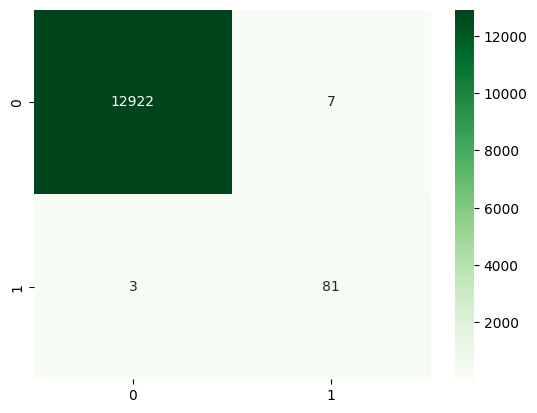

In [12]:
from sklearn.metrics import confusion_matrix

# Pridict data on test data
Y_test_pred = svm.predict(X_test)

# Create confusion matrix using heatmap function from seaborn
sns.heatmap(confusion_matrix(Y_test,Y_test_pred), annot=True, fmt='g',cmap='Greens' )

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score

# Calculate precision, recall, fsocre 
precision,recall,fscore,support=score(Y_test,Y_test_pred)

# Print Calculated matrics
print("Precision" , precision)
print("Recall" , recall)
print("F-score" , fscore)

Precision [0.99976789 0.92045455]
Recall [0.99945858 0.96428571]
F-score [0.99961321 0.94186047]


## Cross Validation

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define kFold with 10 splits
k_fold = KFold(n_splits=10)

# perfoem cross-validation on LinearSVC model using validation split 
score = cross_val_score(svm, X_val, Y_val, scoring='accuracy', cv=k_fold)

# Calculate mean accuracy score
score.mean()

np.float64(0.9996157983165496)

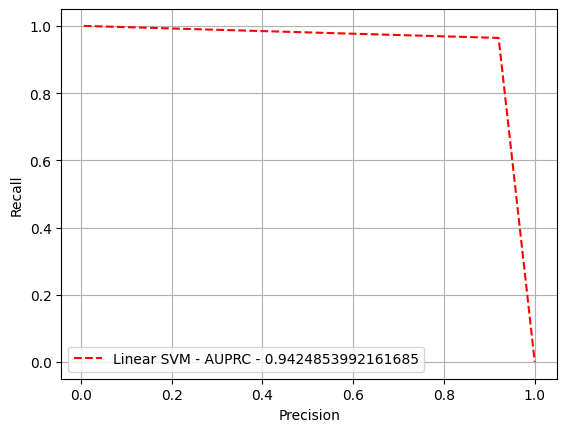

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Calculate precision and recall values for LinearSVC model
svm_precision_val, svm_recall_val, _ = precision_recall_curve(Y_test, Y_test_pred)

# Calculate area for LinearSVC
svm_area = auc(svm_recall_val, svm_precision_val)

# Plot precision-recall curve
plt.plot(svm_precision_val,svm_recall_val, linestyle="--", color='r', label=f'Linear SVM - AUPRC - {svm_area}')

# Plot X and Y lables for graph 
plt.xlabel('Precision')
plt.ylabel('Recall')

# Plot legend and grid
plt.legend()
plt.grid()

# Show graph
plt.show()

### Logistic Regression On Transfer Data

In [16]:
from sklearn.linear_model import LogisticRegression

# Define LogisticRegression model
lr = LogisticRegression()

# Train model on train data
lr.fit(X_train,Y_train)

LogisticRegression()

<Axes: >

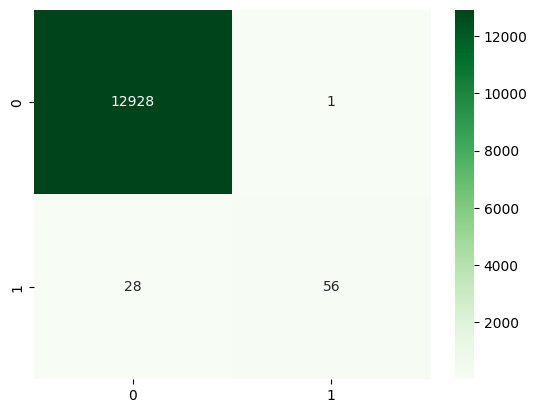

In [17]:
# Pridict data on test data
Y_test_pred = lr.predict(X_test)

# Create confusion matrix using heatmap function from seaborn
sns.heatmap(confusion_matrix(Y_test,Y_test_pred), annot=True, fmt='g',cmap='Greens')

In [18]:
from sklearn.metrics import precision_recall_fscore_support as score

# Calculate precision, recall, fsocre 
precision,recall,fscore,support=score(Y_test,Y_test_pred)

# Print Calculated matrics
print("Precision" , precision)
print("Recall" , recall)
print("F-score" , fscore)

Precision [0.99783884 0.98245614]
Recall [0.99992265 0.66666667]
F-score [0.99887966 0.79432624]


### Cross Validation

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Define kFold with 10 splits
k_fold = KFold(n_splits=10)

# perfoem cross-validation on LinearSVC model using validation split 
score = cross_val_score(lr, X_val, Y_val, scoring='accuracy', cv=k_fold)

# Calculate mean accuracy score
score.mean()

np.float64(0.9997694671828713)

In [20]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values for LogisticRegression model
lr_precision_val, lr_recall_val, _ = precision_recall_curve(Y_test, Y_test_pred)

# Calculate area for LinearSVC
lr_area = auc(lr_recall_val, lr_precision_val)

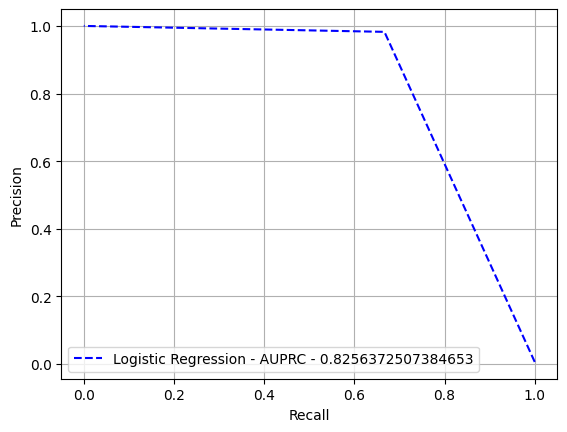

In [21]:
# Plot precision-recall curve
plt.plot(lr_recall_val,lr_precision_val , linestyle="--", color='b', label=f'Logistic Regression - AUPRC - {lr_area}')

# Plot X and Y lables for graph 
plt.xlabel('Recall')
plt.ylabel('Precision')

# Plot legend and grid
plt.grid(True)
plt.legend()

# Show graph
plt.show()